# Ziel - Die Erstellung eines Machine Learning Models für die Klassifizierung verschiedenen Reviews

## Import der Bibliotheken

#### NLTK: Natural Language Processing Toolkit ist eine Python Bibliothek die wir nutzen um NLP Aufgaben wie Stemming, Lemmatisierung, Stopwords entfernen umzusetzten.

#### Porter Stemmer : Ist eine art von Stemmer. Stemming ist eine Technique die ein Wort in einem Wurzel Wort umwandelt. 

bsp für Englisch :
- learning - learn
- earning - earn


In [1]:
import re                                                       ## to use Regular expression
import pickle                                                   ## object serialization 
import nltk                                                     ## preprocessing Reviews                   
import pandas as pd                                             ## loading dataset file
import seaborn as sns                                           ## visulization
nltk.download('stopwords')                                      ## downloading stopwords
from nltk.corpus import stopwords                               ## removing all the stop words
from nltk.stem.porter import PorterStemmer                      ## stemming of words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mihai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Unsere Daten in einer Datei zusammenfassen

In [100]:
# with open('yelp_labelled.txt', 'r') as readfile:
#     lines = readfile.readlines()
# with open('yelp_labelled.txt', 'w') as writefile:
#     for line in lines:
#         if line.strip('\n') != 'Review	Like':
#             writefile.write(line)

# filenames = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']
# with open('dataset.txt', 'w+') as outfile:
#     outfile.write('Review	Like \n')
#     for fname in filenames:
#         with open(fname) as infile:
#             for line in infile:
#                 outfile.write(line)

## Dataset aus Datei lesen

#### Dataset wird aus einer CSV (comma separated values) gelesen. Als Separator für die Spalten im Text wird Tab verwendet

Die Datei enthält zwei Spalten: Review und Like. 

- Review: Enthält Reviews von verschiedenen Kunden
- Like: Ist eine numerische Spalte 0 bedeutet negativ und 1 bedeutet positiv

#### Dateiquelle
- https://www.kaggle.com/cipherlab/amazonyelptwittersentiment


In [2]:
#header_list = ["Like", "Review"]
dataset = pd.read_csv('IMDB Dataset.csv')
#dataset = dataset.dropna()
#dataset = dataset.fillna("NULL")
dataset['sentiment'] = dataset['sentiment'].replace("positive", 1)
dataset['sentiment'] = dataset['sentiment'].replace("negative", 0)

## EDA (exploratory data analysis) für unser Dataset

wir wollen überprüfen ob: 
- die Anzahl von Spalten richtig ist(2)
- die Namen der Spalten richtig sind (Review und Like)
- die Anzahl der Zeilen richtig ist (1000)
- die Daten enthalten keine NULL Werte
- der datentyp für die Like Spalte numerisch ist

In [3]:
print(dataset.shape);           ### Return the shape of data 
print(dataset.ndim);            ### Return the n dimensions of data
print(dataset.size);            ### Return the size of data 
print(dataset.isna().sum());    ### Returns the sum fo all na values
print(dataset.info());          ### Give concise summary of a DataFrame
print(dataset.head());          ## top 5 rows of the dataframe
print(dataset.tail());          ## bottom 5 rows of the dataframe

(50000, 2)
2
100000
review       0
sentiment    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB
None
                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1
                                                  review  sentiment
49995  I thought this movie did a down right good job...          1
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0
49997  I am a Catholic taugh

## Wir zeigen die Spalte Like in einem Graph 

#### Wir wollen sicherstellen das dieAnzahl von negativen (Like = 0) und positiven (Like = 1) Reviews gleich ist.

D:\backup\_DSqleen\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

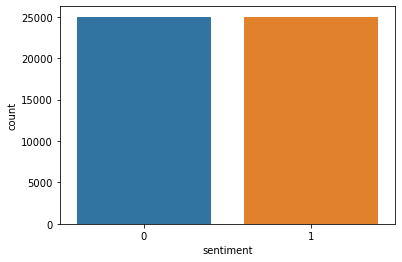

In [4]:
sns.countplot('sentiment', data=dataset)

## Preprocessing der Daten

### Damit wollen wir die Daten für den Maschine Learning Algorithmus vorbereiten

#### für jedes Review:

- Entfernung aller Zeichen die keine Buchstaben sind
- Konvertierung aller Buchstaben in Kleinbuchstaben
- Wir entfernen alle Stopwords (Stoppwörter). Diese sind Worte die sehr häufig auftreten und keine Relevanz für die Erfassung des Dokumentinhalts besitzen. Allgemein übliche Stoppwörter sind bestimmte Artikel, unbestimmte Artikel, Konjunktionen und häufig gebrauchte Präpositionen. Eine Ausnahme: hier entfernen wir nicht das Wort "not" weil es die Bedeutung eines Reviews ändern kann.

In [5]:
corpus = []
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
all_stopwords.extend(['br'])
all_stopwords.extend(['br', 'even', 'also', 'may'])
all_stopwords_set = set(all_stopwords)
ps = PorterStemmer()

for i in range(0,len(dataset)):                                                     
     review = re.sub('[^a-zA-Z]',' ',dataset['review'][i])
     review = review.lower()
     review = review.split()
     review = [ps.stem(word) for word in review if not word in all_stopwords_set]
     review = " ".join(review)
     corpus.append(review)
# print(corpus)

## Visualisierung der Daten als WordCloud

### Eine Wordcloud ist eine Ansammlung von Wörtern mit verschiedenen Größen, die sich durch die Häufigkeit der Wörter im zugrundeliegenden Text ergeben. 
### Aufgrund der grafischen Darstellung der Wörter in einer Wordcloud können Schwerpunkte eines Textes sehr schnell herausgestellt und erfasst werden


There are 36094257 words in the combination of all reviews.


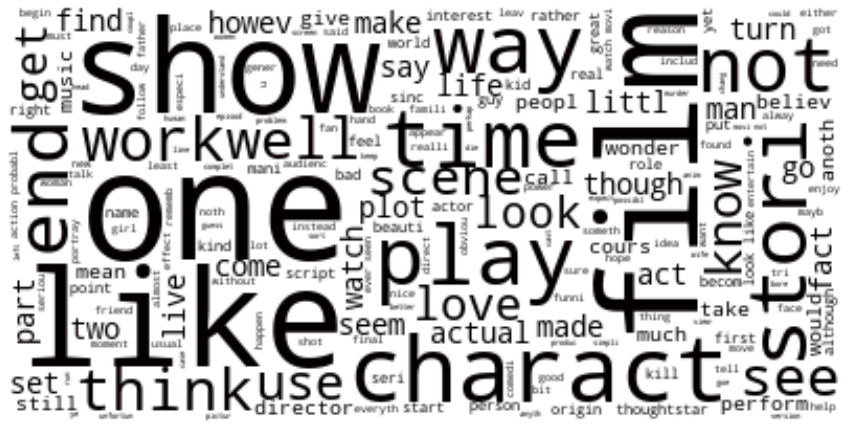

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

# kombinieren allen Reviews in einem großen Text um in einem WordCloud zu visualisieren
# welche Eigenschaften der Filme am meisten erscheinen
text = " ".join(review for review in corpus)
print ("There are {} words in the combination of all reviews.".format(len(text)))

# wir wollen das WordCloud Schwarz/Weiß darstellen
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

# WordCloud Bild erstellen
# setze Hintergrund Weiß
# setze max_words auf 200
wordcloud = WordCloud(stopwords=all_stopwords, max_font_size=72, max_words=200, background_color="white").generate(text)

# setze Farbe für die Wörter auf Schwarz
wordcloud.recolor(color_func = black_color_func)

# das dargestellte Bild soll größer sein
plt.figure(figsize=[15,10])

# Zeige das generierte Bild mit matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Erstellen eines Bag of Words

Die Eingangsdaten,sind eine Folge von Symbolen, die nicht direkt an die Algorithmen selbst weitergeleitet werden können, da die meisten Algorithmen numerische Merkmals-vektoren mit einer festen Größe erwarten, anstelle  der Rohtextdokumente mit variabler Länge. 

Um dies zu beheben, werden numerische Merkmale aus Textinhalten extrahiert, nämlich:
- Tokenising von Zeichenfolgen und Angabe einer ganzzahligen ID für jedes mögliche Token,  
- Counting der Vorkommen von Token in jedem Dokument.
- Normalizing und Gewichtung mit abnehmender Wichtigkeit Token, die in der Mehrzahl  der Daten vorkommen. 

Ein Korpus von Dokumenten kann somit durch eine Matrix dargestellt werden, wobei  eine Zeile pro Dokument und eine Spalte pro Token (z.B. Wort) im Korpus vorkommt. 

Wir nennen Vektorisierung(CountVectorizer) den allgemeinen Prozess, bei dem eine Sammlung von Text-dokumenten in numerische Merkmalsvektoren umgewandelt wird. Diese spezifische Strategie (Tokenisierung, Zählung und Normalisierung) wird als Bag of Words oder "Bag of n-Grams" -Darstellung  bezeichnet. Dokumente werden durch  Wortvorkommen beschrieben, wobei die relativen Positionsinformationen der Wörter im Dokumentvoll-ständig ignoriert werden. 


In [7]:
cv = CountVectorizer(max_features=1500) ##1500 columns
X = cv.fit_transform(corpus).toarray()
y = dataset['sentiment']

## Speicherung von Bag of Words in einer Datei

In [9]:
pickle.dump(cv, open('cv.pkl', 'wb'))

## Split von Daten in Training- und Testdaten

80 % von Daten werden als Trainingdaten verwendet und
20 % von Daten werden als Testdaten verwendet

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# daten werden hier für den nächsten Notenook gespeichert

%store X_train
%store X_test
%store y_train
%store y_test

Stored 'X_train' (ndarray)
Stored 'X_test' (ndarray)
Stored 'y_train' (Series)
Stored 'y_test' (Series)
